# $
\color{blue}{\text{Resposiciones y final}}
$ 

**Nombre:**                  
**Reposiciones que presentaré:**

**Instrucciones:** Constestar sólamente las preguntas de la(s) tarea(s) que se quieren reponer. Se pueden reponer 2 tareas máximo o resolver todo el examen en caso de hacer examen final. Si se repone una sola tarea, el tiempo límite son 2 horas. Si se reponen dos, 4 horas. En caso de hacer final tienen 6 horas para entregar el examen. En necesario entregarlo a tiempo para no perder puntos. Cada pregunta tiene el mismo puntaje.
Recordatorio: la calificación de las reposiciones son las que se quedan al final. 

# $\color{green}{\text{Reposición 1}}$
# $\color{red}{\text{Calificación:}}$

## Ejercicio 1

Crear un programa que diga si un número es primo o no.

## Ejercicio 2

Crear una función $f(a)$ donde $a$ es un entero (positivo o negativo) y devuelva todos los divisores de $a$ 

## Ejercicio 3

Crear una función $f(a,b)$ donde $a,b\in\mathbb{Z}$ que diga a qué es congruente $a$ módulo $b$.

## Ejercicio 4

Crear una función $f(a,b,c)$ donde $a,b,c\in\mathbb{Z}$ que sume todos los números de $a$ hasta $b$ haciendo saltos de $c$ en $c$. Si no se pone nada en $c$ por default lo tendrá que hacer de 1 en 1. Si $a$ es mayor que $b$, deberá aparecer un mensaje que diga que $a$ debe ser menor a $b$.

# $\color{green}{\text{Reposición 2}}$
# $\color{red}{\text{Calificación:}}$

## Ejercicio 1

Escribir una función $f(v_1, v_2)$ donde $v_1,v_2\in\mathbb{R}^2$ que determine el área determinada por $v_1$ y $v_2$. Si los vectores son linealmente dependientes el programa debe arrojar un mensaje que de esta información.

## Ejercicio 2

Crear un programa que resuelva utilizando el método de Gauss una ecuación del siguiente tipo:

$$\begin{align*}
a_{11}x_1 + a_{12}x_2 +a_{13}x_3 &= b_1\\
a_{21}x_1 + a_{22}x_2 +a_{23}x_3 &= b_2\\
a_{31}x_1 +a_{32}x_2+a_{33}x_3  &= b_3
\end{align*}$$

Si el sistema no tiene solución el programa deberá arrojar un mensaje con esta información.

# $\color{green}{\text{Reposición 3}}$
# $\color{red}{\text{Calificación:}}$

## Ejercicio 1

Escribir una función $F(f,a)$ donde $f$ es una función mínimo 2 veces diferenciable y $a$ un real en el dominio de $f$, y que devuelva la primera derivada y la segunda derivada de $f$, así como la primera y la segunda derivada de $f$ evaluadas en $a$. La programación debe utilizar el método de diferencias finitas.

## Ejercicio 2

Escribir una función $I(f,a,b)$ donde $f$ es una función integrable en  $[a,b]$ $(a\leq b)$ y que devuelva el valor de la integral evaluada en el intervalo $[a,b]$. En la programación se debe usar métodos numéricos (no usar sympy).

# $\color{green}{\text{Reposición 4}}$
# $\color{red}{\text{Calificación:}}$

In [28]:
# Importando las librerías a utilizar
import numpy as np # Numerical python
import matplotlib.pyplot as plt # Gráficas
from scipy.integrate import odeint # Resvolver ecuaciones diferenciales
from scipy.optimize import newton # Metodo de newton para ec

## Ejercicio 1

Resolver el siguiente problema de valor inicial:

$$ y''-4y=12x;\quad y(0)=4\,\,\,y'(0)=1$$

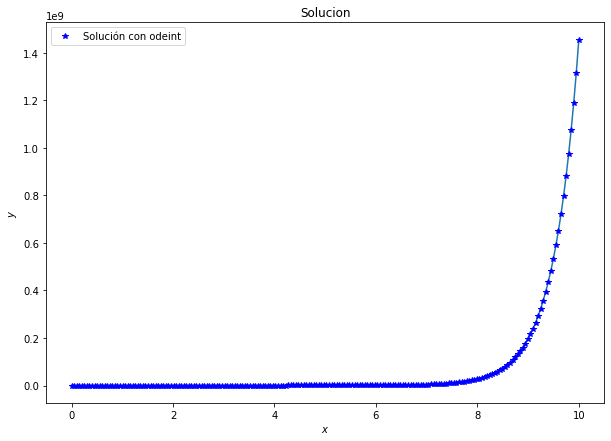

In [29]:
# definimos el campo
def diff(u,x):
    return (u[1], 4*u[0] + 12*x)

y0 = [4,1] # Vector de condiciones iniciales
xs = np.linspace(0,10,200) # Variable x
us = odeint(diff,y0,xs) # Se resuelve la ecuación con disparo
ys = us[:,0] # Obtenemos la solución y(x)

# Graficamos
plt.figure(figsize=(10,7))
plt.plot(xs, ys, '-')
plt.plot(xs, ys, 'b*', label = "Solución con odeint")
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.title("Solucion")
plt.legend()
plt.show()

## Ejercicio 2

Utilizar los métodos del disparo y de diferencias finitas para resolver la siguiente EDO de con valores de frontera. 

$$ y''+2y'+y=0$$

Graficar ambas soluciones y comparar con la solución exacta $y(x)=e^{-x}+(3e-1)xe^{-x}$.

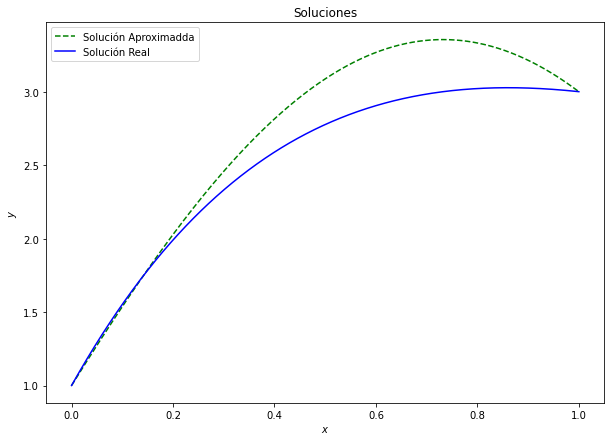

In [31]:
# Se defina la funcion
def shooting(dydx, x, x0, xf, shoot=None):
    if shoot is None:
        shoot = np.random.uniform(-20, 20)
    F = lambda s, x0, xf, x: odeint(dydx, [x0, s], x)[-1, 0] - xf
    shoot = newton(F, shoot, args=(x0, xf, x))
    y = odeint(dydx, [x0, shoot], x)
    return y[:, 0], shoot

#Se define el campo
func = lambda y, t: [y[1], -2*y[0]-y[0]]
x = np.linspace(0, 1, 1000)
y, shoot = shooting(func, x, 1, 3, shoot=-5)
y1 = np.exp(-x) + (3*np.exp(1)-1)*x*np.exp(-x) #Solución Real

#Gráficas
plt.figure(figsize=(10,7))
plt.plot(x, y, '--g', label = "Solución Aproximadda")
plt.plot(x, y1, 'b-', label = "Solución Real")
plt.plot()
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.title("Soluciones")
plt.legend()
plt.show()


# $\color{green}{\text{Reposición 5}}$
# $\color{red}{\text{Calificación:}}$

## Ejercicio 1

Resolver la siguiente EDP:

$$\frac{\partial^2 u}{\partial t^2}=9\frac{\partial^2 u}{\partial x^2} $$

Esta ecuación representa el movimiento de una cuerda de longitud $L$ la cual supondremos igual a 1. Tenemos las condiciones siguientes: $u(0,t)=0$; $u(1,t)=0$ y además suponemos que en la posición inicial, jalamos la cuerda hacia abajo a un cuarto del total a una distancia de $0.25$. Suponemos que en el instante 0 soltamos la cuerda sin velocidad. 

Graficar la solución para diferentes tiempos $t$.

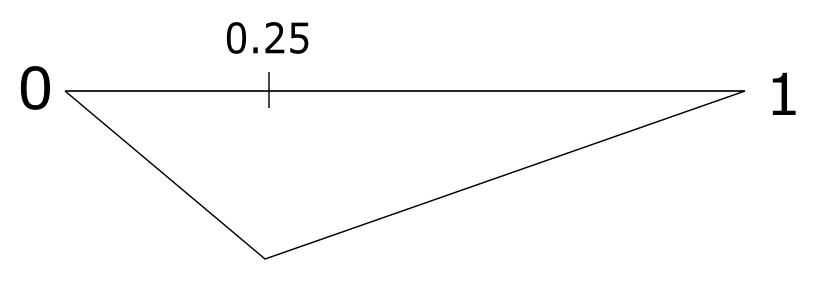

## Ejercicio 2

Crear un programa que resuelva cualquier EDP de tipo hiperbólico. (El usuario mete los datos en el programa)

# $\color{green}{\text{Reposición 6}}$
# $\color{red}{\text{Calificación:}}$

## Ejercicio 1

Investigar es histórico de la temperatura promedio en abril en la ciudad de México desde el año 1950 hasta 2022. Trazar una curva que pase por los datos de estos años haciendo saltos de 4 años (es decir, 1950, 1954, 1958 etc.) Concluir acerca de la tendencia de estos datos.

## Ejercicio 2

Determinar el área de "las islas" con ayuda de la curva frontera de este espacio. Graficar esa curva.